<a href="https://colab.research.google.com/github/netrialiarahmi/Detecting-positive-and-negative-sentiments-in-user-reviews/blob/main/Detecting_positive_and_negative_sentiments_in_user_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction Models

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

d=pd.read_csv('/content/drive/MyDrive/student/student-por.csv',sep=';',header=0)

Mounted at /content/drive


In [ ]:
d['pass']=d.apply(lambda row:1 if (row['G1']+row['G2']+row['G3'])>=35 else 0, axis=1)
d=d.drop(['G1','G2','G3'], axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [ ]:
d=pd.get_dummies(d, columns=['sex','school','address','famsize','Pstatus','Mjob', 'Fjob',
                             'reason','guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                             'nursery','higher', 'internet', 'romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [ ]:
d=d.sample(frac=1)
d_train=d[:500]
d_test=d[500:]

d_train_att=d_train.drop(['pass'],axis=1)
d_train_pass=d_train['pass']

d_test_att=d_test.drop(['pass'],axis=1)
d_test_pass=d_test['pass']

d_att=d.drop(['pass'], axis=1)
d_pass=d['pass']

In [ ]:
import numpy as np
print("passing {} out of {} ({}%)".format(np.sum(d_pass), len(d_pass), round(100*float(np.sum(d_pass))/len(d_pass),2)))

passing 328 out of 649 (50.54%)


In [ ]:
from sklearn import tree
t=tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
t=t.fit(d_train_att, d_train_pass)

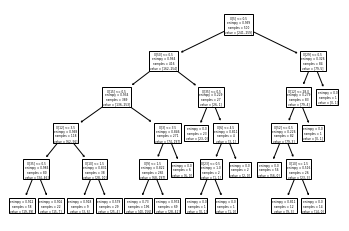

In [ ]:
import matplotlib.pyplot as plt

fig1=plt.figure(1)
tree.plot_tree(t)
fig1.show()

In [ ]:
tree.export_graphviz(t,out_file='student-performance.dot', label='all', impurity=False, proportion=True,
                     feature_names=list(d_train_att), class_names=['fail', 'pass'],
                     filled=True, rounded=True)

In [ ]:
t.score(d_test_att,d_test_pass)

0.610738255033557

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(t, d_att, d_pass, cv=5)
print("Accuracy: {} (+/- {})".format(round(scores.mean(),2), round(scores.std(),2)))

Accuracy: 0.67 (+/- 0.04)


In [ ]:
for max_depth in range(1,20):
  t=tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  scores=cross_val_score(t, d_att, d_pass, cv=5)
  print("Max depth: {}, Accuracy: {} (+/- {}) ".format(round(max_depth,2), round(scores.mean(),2), round(scores.std()*2, 2)))

Max depth: 1, Accuracy: 0.64 (+/- 0.05) 
Max depth: 2, Accuracy: 0.69 (+/- 0.08) 
Max depth: 3, Accuracy: 0.69 (+/- 0.06) 
Max depth: 4, Accuracy: 0.69 (+/- 0.08) 
Max depth: 5, Accuracy: 0.67 (+/- 0.09) 
Max depth: 6, Accuracy: 0.69 (+/- 0.1) 
Max depth: 7, Accuracy: 0.69 (+/- 0.09) 
Max depth: 8, Accuracy: 0.68 (+/- 0.09) 
Max depth: 9, Accuracy: 0.65 (+/- 0.06) 
Max depth: 10, Accuracy: 0.68 (+/- 0.06) 
Max depth: 11, Accuracy: 0.66 (+/- 0.05) 
Max depth: 12, Accuracy: 0.67 (+/- 0.08) 
Max depth: 13, Accuracy: 0.65 (+/- 0.05) 
Max depth: 14, Accuracy: 0.66 (+/- 0.06) 
Max depth: 15, Accuracy: 0.66 (+/- 0.07) 
Max depth: 16, Accuracy: 0.66 (+/- 0.07) 
Max depth: 17, Accuracy: 0.66 (+/- 0.07) 
Max depth: 18, Accuracy: 0.66 (+/- 0.06) 
Max depth: 19, Accuracy: 0.65 (+/- 0.08) 


In [ ]:
depth_acc=np.empty((19,3), float)
i=0
for max_depth in range (1,20):
  t=tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
  scores=cross_val_score(t, d_att, d_pass, cv=5)
  depth_acc[i,0]=max_depth
  depth_acc[i,1]=scores.mean()
  depth_acc[i,2]=scores.std()*2

depth_acc

array([[1.90000000e+001, 6.54764460e-001, 6.62556081e-002],
       [1.48219694e-323, 1.97626258e-323, 2.47032823e-323],
       [2.96439388e-323, 3.45845952e-323, 3.95252517e-323],
       [4.44659081e-323, 4.94065646e-323, 5.43472210e-323],
       [5.92878775e-323, 6.42285340e-323, 0.00000000e+000],
       [4.94065646e-324, 9.88131292e-324, 1.48219694e-323],
       [1.97626258e-323, 2.47032823e-323, 2.96439388e-323],
       [3.45845952e-323, 3.95252517e-323, 4.44659081e-323],
       [4.94065646e-323, 5.43472210e-323, 5.92878775e-323],
       [6.42285340e-323, 6.91691904e-323, 7.41098469e-323],
       [7.90505033e-323, 8.39911598e-323, 8.89318163e-323],
       [9.38724727e-323, 9.88131292e-323, 1.03753786e-322],
       [1.08694442e-322, 1.13635099e-322, 1.18575755e-322],
       [1.23516411e-322, 1.28457068e-322, 1.33397724e-322],
       [1.38338381e-322, 1.43279037e-322, 1.48219694e-322],
       [1.53160350e-322, 1.58101007e-322, 1.63041663e-322],
       [1.67982320e-322, 1.72922976e-322

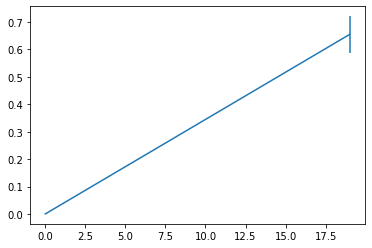

In [ ]:
fig,ax=plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()

#Prediction with Random Forest

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

imgatt = pd.read_csv('/content/drive/MyDrive/image_attribute_labels.txt',
                     sep='\s+', header=None, error_bad_lines=False, warn_bad_lines=False,
                     usecols=[0,1,2], names=['imgid', 'attid', 'present'])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
imgatt.head()

,imgid,attid,present
0,1,1,0
1,1,2,0
2,1,3,0
3,1,4,0
4,1,5,1


In [ ]:
imgatt.shape

(3677856, 3)

In [ ]:
imgatt2 = imgatt.pivot(index='imgid', columns='attid', values='present')
imgatt2.head()

attid,1,2,3,4,5,6,7,8,9,10,...,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
imgatt2.shape

(11788, 312)

In [ ]:
imglabels = pd.read_csv('/content/drive/MyDrive/image_class_labels.txt', 
                        sep=' ', header=None, names=['imgid', 'label'])
imglabels = imglabels.set_index('imgid')

In [ ]:
imglabels.head()

,label
imgid,
1,1
2,1
3,1
4,1
5,1


In [ ]:
imglabels.shape

(11788, 1)

In [ ]:
df = imgatt2.join(imglabels)
df = df.sample(frac=1)
df_att = df.iloc[:, :312]
df_label = df.iloc[:, 312:]

In [ ]:
df_att.head()

,1,2,3,4,5,6,7,8,9,10,...,303,304,305,306,307,308,309,310,311,312
imgid,,,,,,,,,,,,,,,,,,,,,
9793,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6153,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
11069,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8715,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3950,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
df_label.head()

,label
imgid,
9793,167
6153,106
11069,188
8715,149
3950,68


In [ ]:
df_train_att = df_att[:8000]
df_train_label = df_label[:8000]
df_test_att = df_att[8000:]
df_test_label = df_label[8000:]

df_train_label = df_train_label['label']
df_test_label = df_test_label['label']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_features=50, random_state=0, n_estimators=100)

In [ ]:
clf.fit(df_train_att, df_train_label)

RandomForestClassifier(max_features=50, random_state=0)

In [ ]:
print(clf.predict(df_train_att.head()))

[167 106 188 149  68]


In [ ]:
clf.score(df_test_att, df_test_label)

0.43954593453009505

In [ ]:
from sklearn.metrics import confusion_matrix
pred_labels = clf.predict(df_test_att)
cm = confusion_matrix(df_test_label, pred_labels)

In [ ]:
cm

array([[ 4,  2,  5, ...,  0,  0,  0],
       [ 0, 15,  0, ...,  0,  0,  0],
       [ 0,  0,  7, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  0,  5,  0],
       [ 0,  0,  0, ...,  0,  0, 18]])

Two hundred by two hundred is not easy to understand in a numeric form like this.
Here's some code from the scikit-learn documentation that allows us to plot the matrix and the color in the matrix

In [ ]:
# from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    #for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    #    plt.text(j, i, format(cm[i, j], fmt),
    #             horizontalalignment="center",
    #             color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
birds=pd.read_csv('/content/drive/MyDrive/classes.txt',
              sep='\s+', header=None, usecols=[1], names=['birdname'])
birds = birds['birdname']
birds

0      001.Black_footed_Albatross
1            002.Laysan_Albatross
2             003.Sooty_Albatross
3           004.Groove_billed_Ani
4              005.Crested_Auklet
                  ...            
195                196.House_Wren
196                197.Marsh_Wren
197                 198.Rock_Wren
198               199.Winter_Wren
199       200.Common_Yellowthroat
Name: birdname, Length: 200, dtype: object

In [ ]:
import numpy as np
np.set_printoptions(precision=2)
plt.figure(figsize=(60,60), dpi=300)
plot_confusion_matrix(cm, classes=birds, normalize=True)
plt.show()

Normalized confusion matrix
[[0.26 0.13 0.13 ... 0.   0.   0.  ]
 [0.   0.67 0.   ... 0.   0.   0.  ]
 [0.   0.07 0.47 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.05 ... 0.1  0.   0.  ]
 [0.   0.   0.   ... 0.   0.36 0.  ]
 [0.   0.   0.   ... 0.   0.   0.89]]


In [ ]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()
clftree.fit(df_train_att, df_train_label)
clftree.score(df_test_att, df_test_label)

0.27560718057022177

In [ ]:
from sklearn import svm
clfsvm = svm.SVC()
clfsvm.fit(df_train_att, df_train_label)
clfsvm.score(df_test_att, df_test_label)

0.47624076029567053

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.45 (+/- 0.02)


In [ ]:
scorestree = cross_val_score(clftree, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scorestree.mean(), scorestree.std() * 2))

Accuracy: 0.26 (+/- 0.02)


In [ ]:
scoressvm = cross_val_score(clfsvm, df_train_att, df_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scoressvm.mean(), scoressvm.std() * 2))

Accuracy: 0.47 (+/- 0.02)


In [ ]:
max_features_opts = range(5, 50, 5)
n_estimators_opts = range(10, 200, 20)
rf_params = np.empty((len(max_features_opts)*len(n_estimators_opts),4), float)
i = 0
for max_features in max_features_opts:
    for n_estimators in n_estimators_opts:
        clf = RandomForestClassifier(max_features=max_features, n_estimators=n_estimators)
        scores = cross_val_score(clf, df_train_att, df_train_label, cv=5)
        rf_params[i,0] = max_features
        rf_params[i,1] = n_estimators
        rf_params[i,2] = scores.mean()
        rf_params[i,3] = scores.std() * 2
        i += 1
        print("Max features: %d, num estimators: %d, accuracy: %0.2f (+/- %0.2f)" % \
              (max_features, n_estimators, scores.mean(), scores.std() * 2))

Max features: 5, num estimators: 10, accuracy: 0.26 (+/- 0.01)
Max features: 5, num estimators: 30, accuracy: 0.35 (+/- 0.02)
Max features: 5, num estimators: 50, accuracy: 0.39 (+/- 0.02)
Max features: 5, num estimators: 70, accuracy: 0.41 (+/- 0.02)
Max features: 5, num estimators: 90, accuracy: 0.42 (+/- 0.03)
Max features: 5, num estimators: 110, accuracy: 0.43 (+/- 0.02)
Max features: 5, num estimators: 130, accuracy: 0.44 (+/- 0.02)
Max features: 5, num estimators: 150, accuracy: 0.44 (+/- 0.03)
Max features: 5, num estimators: 170, accuracy: 0.45 (+/- 0.03)
Max features: 5, num estimators: 190, accuracy: 0.45 (+/- 0.03)
Max features: 10, num estimators: 10, accuracy: 0.30 (+/- 0.03)
Max features: 10, num estimators: 30, accuracy: 0.38 (+/- 0.02)
Max features: 10, num estimators: 50, accuracy: 0.41 (+/- 0.04)
Max features: 10, num estimators: 70, accuracy: 0.43 (+/- 0.03)
Max features: 10, num estimators: 90, accuracy: 0.44 (+/- 0.03)
Max features: 10, num estimators: 110, accura

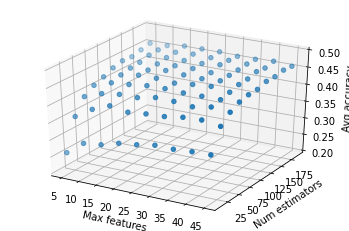

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
fig.clf()
ax = fig.gca(projection='3d')
x = rf_params[:,0]
y = rf_params[:,1]
z = rf_params[:,2]
ax.scatter(x, y, z)
ax.set_zlim(0.2, 0.5)
ax.set_xlabel('Max features')
ax.set_ylabel('Num estimators')
ax.set_zlabel('Avg accuracy')
plt.show()

#Applications for Comment Classification
Dont forget to:


* Lowercase every word
* Drop punctuation
* Drop very common words (stop words)
* Remove plurals (for example, bunnies => bunny)
* Perform lemmatization (for example, reader => read, reading = read)
* Use n-grams, such as bigrams (two-word pairs) or trigrams
* Keep only frequent words (for example, must appear in >10 examples)
* Keep only the most frequent M words (for example, keep only 1,000)
* Record binary counts (1 = present, 0 = absent) rather than true counts



In [ ]:
import pandas as pd
d=pd.read_csv('/content/drive/MyDrive/YouTube-Spam-Collection-v1/Youtube01-Psy.csv')

In [ ]:
d.tail()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1
349,z13vhvu54u3ewpp5h04ccb4zuoardrmjlyk0k,Ray Benich,2015-06-05T18:05:16,The first billion viewed this because they tho...,0


In [ ]:
len(d.query('CLASS==1'))

175

In [ ]:
len(d.query('CLASS==0'))

175

In [ ]:
len(d)

350

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
dvec = vectorizer.fit_transform(d['CONTENT'])

In [ ]:
dvec

<350x1418 sparse matrix of type '<class 'numpy.int64'>'
	with 4354 stored elements in Compressed Sparse Row format>

In [ ]:
analyze = vectorizer.build_analyzer()

In [ ]:
print(d['CONTENT'][349])
analyze(d['CONTENT'][349])

The first billion viewed this because they thought it was really cool, the  other billion and a half came to see how stupid the first billion were...﻿


['the',
 'first',
 'billion',
 'viewed',
 'this',
 'because',
 'they',
 'thought',
 'it',
 'was',
 'really',
 'cool',
 'the',
 'other',
 'billion',
 'and',
 'half',
 'came',
 'to',
 'see',
 'how',
 'stupid',
 'the',
 'first',
 'billion',
 'were']

In [ ]:
vectorizer.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '02',
 '034',
 '05',
 '08',
 '10',
 '100',
 '100000415527985',
 '10200253113705769',
 '1030',
 '1073741828',
 '11',
 '1111',
 '112720997191206369631',
 '12',
 '123',
 '124',
 '124923004',
 '126',
 '127',
 '13017194',
 '131338190916',
 '1340488',
 '1340489',
 '1340490',
 '1340491',
 '1340492',
 '1340493',
 '1340494',
 '1340499',
 '1340500',
 '1340502',
 '1340503',
 '1340504',
 '1340517',
 '1340518',
 '1340519',
 '1340520',
 '1340521',
 '1340522',
 '1340523',
 '1340524',
 '134470083389909',
 '1415297812',
 '1495323920744243',
 '1496241863981208',
 '1496273723978022',
 '1498561870415874',
 '161620527267482',
 '171183229277',
 '19',
 '19924',
 '1firo',
 '1m',
 '20',
 '2009',
 '2012',
 '2012bitches',
 '2013',
 '2014',
 '201470069872822',
 '2015',
 '2017',
 '210',
 '23',
 '24',
 '24398',
 '243a',
 '279',
 '29',
 '2b',
 '2billion',
 '2x10',
 '300',
 '3000',
 '313327',
 '315',
 '322',
 '33',
 '33gxrf',
 '39',
 '390875584405933',
 '391725794320912',
 '40beuutvu2zkxk4utgpz8k',
 '

In [ ]:
dshuf = d.sample(frac=1)

In [ ]:
d_train = dshuf[:300]
d_test = dshuf[300:]
d_train_att = vectorizer.fit_transform(d_train['CONTENT']) # fit bag-of-words on training set
d_test_att = vectorizer.transform(d_test['CONTENT']) # reuse on testing set
d_train_label = d_train['CLASS']
d_test_label = d_test['CLASS']

In [ ]:
d_train_att

<300x1256 sparse matrix of type '<class 'numpy.int64'>'
	with 3709 stored elements in Compressed Sparse Row format>

In [ ]:
d_test_att

<50x1256 sparse matrix of type '<class 'numpy.int64'>'
	with 475 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=80)

In [ ]:
clf.fit(d_train_att, d_train_label)

RandomForestClassifier(n_estimators=80)

In [ ]:
clf.score(d_test_att, d_test_label)

0.96

In [ ]:
from sklearn.metrics import confusion_matrix
pred_labels = clf.predict(d_test_att)
confusion_matrix(d_test_label, pred_labels)

array([[26,  1],
       [ 1, 22]])

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, d_train_att, d_train_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.06)


In [ ]:
d=pd.concat([pd.read_csv('/content/drive/MyDrive/YouTube-Spam-Collection-v1/Youtube01-Psy.csv'),
             pd.read_csv('/content/drive/MyDrive/YouTube-Spam-Collection-v1/Youtube02-KatyPerry.csv'),
             pd.read_csv("/content/drive/MyDrive/YouTube-Spam-Collection-v1//Youtube03-LMFAO.csv"),
             pd.read_csv('/content/drive/MyDrive/YouTube-Spam-Collection-v1/Youtube04-Eminem.csv'),
             pd.read_csv('/content/drive/MyDrive/YouTube-Spam-Collection-v1/Youtube05-Shakira.csv')])

In [ ]:
len(d)

1956

In [ ]:
len(d.query('CLASS==0'))

951

In [ ]:
len(d.query('CLASS==1'))

1005

In [ ]:
dshuf = d.sample(frac=1)
d_content = dshuf['CONTENT']
d_label = dshuf['CLASS']

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
pipeline = Pipeline([
    ('bag-of-words', CountVectorizer()),
    ('random forest', RandomForestClassifier()),
])
pipeline

Pipeline(steps=[('bag-of-words', CountVectorizer()),
                ('random forest', RandomForestClassifier())])

In [ ]:
make_pipeline(CountVectorizer(), RandomForestClassifier())

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
pipeline.fit(d_content[:1500],d_label[:1500])

Pipeline(steps=[('bag-of-words', CountVectorizer()),
                ('random forest', RandomForestClassifier())])

In [ ]:
pipeline.score(d_content[1500:], d_label[1500:])

0.9649122807017544

In [ ]:
pipeline.predict(["what a neat video!"])

array([0])

In [ ]:
pipeline.predict(["plz subscribe to my channel"])

array([1])

In [ ]:
scores = cross_val_score(pipeline, d_content, d_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.02)


In [ ]:
# add tfidf
from sklearn.feature_extraction.text import TfidfTransformer
pipeline2 = make_pipeline(CountVectorizer(),
                          TfidfTransformer(norm=None),
                          RandomForestClassifier())

In [ ]:
scores = cross_val_score(pipeline2, d_content, d_label, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.02)


In [ ]:
pipeline2.steps

[('countvectorizer', CountVectorizer()),
 ('tfidftransformer', TfidfTransformer(norm=None)),
 ('randomforestclassifier', RandomForestClassifier())]

In [ ]:
# parameter search
parameters = {
    'countvectorizer__max_features': (None, 1000, 2000),
    'countvectorizer__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'countvectorizer__stop_words': ('english', None),
    'tfidftransformer__use_idf': (True, False), # effectively turn on/off tfidf
    'randomforestclassifier__n_estimators': (20, 50, 100)
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline2, parameters, n_jobs=-1, verbose=1)

In [ ]:
grid_search.fit(d_content, d_label)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('tfidftransformer',
                                        TfidfTransformer(norm=None)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': (None, 1000, 2000),
                         'countvectorizer__ngram_range': ((1, 1), (1, 2)),
                         'countvectorizer__stop_words': ('english', None),
                         'randomforestclassifier__n_estimators': (20, 50, 100),
                         'tfidftransformer__use_idf': (True, False)},
             verbose=1)

In [ ]:
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.963
Best parameters set:
	countvectorizer__max_features: 1000
	countvectorizer__ngram_range: (1, 2)
	countvectorizer__stop_words: None
	randomforestclassifier__n_estimators: 50
	tfidftransformer__use_idf: True


##Detecting positive and negative sentiments in user reviews

In [ ]:
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2022-07-11 12:28:33--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.41.102
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.41.102|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
gmodel = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
gmodel['cat']

In [ ]:
gmodel['dog']

In [ ]:
gmodel['spatula']

In [ ]:
gmodel.similarity('cat', 'dog')

In [ ]:
gmodel.similarity('cat', 'spatula')

In [ ]:
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec

In [ ]:
def extract_words(sent):
    sent = sent.lower()
    sent = re.sub(r'<[^>]+>', ' ', sent) # strip html tags
    sent = re.sub(r'(\w)\'(\w)', '\1\2', sent) # remove apostrophes
    sent = re.sub(r'\W', ' ', sent) # remove punctuation
    sent = re.sub(r'\s+', ' ', sent) # remove repeated spaces
    sent = sent.strip()
    return sent.split()

In [ ]:
# unsupervised training data
import re
import os
unsup_sentences = []

# source: http://ai.stanford.edu/~amaas/data/sentiment/, data from IMDB
for dirname in ["train/pos", "train/neg", "train/unsup", "test/pos", "test/neg"]:
    for fname in sorted(os.listdir("aclImdb/" + dirname)):
        if fname[-4:] == '.txt':
            with open("aclImdb/" + dirname + "/" + fname, encoding='UTF-8') as f:
                sent = f.read()
                words = extract_words(sent)
                unsup_sentences.append(TaggedDocument(words, [dirname + "/" + fname]))

# source: http://www.cs.cornell.edu/people/pabo/movie-review-data/
for dirname in ["review_polarity/txt_sentoken/pos", "review_polarity/txt_sentoken/neg"]:
    for fname in sorted(os.listdir(dirname)):
        if fname[-4:] == '.txt':
            with open(dirname + "/" + fname, encoding='UTF-8') as f:
                for i, sent in enumerate(f):
                    words = extract_words(sent)
                    unsup_sentences.append(TaggedDocument(words, ["%s/%s-%d" % (dirname, fname, i)]))
                
# source: https://nlp.stanford.edu/sentiment/, data from Rotten Tomatoes
with open("stanfordSentimentTreebank/original_rt_snippets.txt", encoding='UTF-8') as f:
    for i, line in enumerate(f):
        words = extract_words(sent)
        unsup_sentences.append(TaggedDocument(words, ["rt-%d" % i]))

In [ ]:
import librosa
import librosa.feature
import librosa.display
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical

In [ ]:
def display_mfcc(song):
    y, _ = librosa.load(song)
    mfcc = librosa.feature.mfcc(y)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title(song)
    plt.tight_layout()
    plt.show()

Mounted at /content/drive


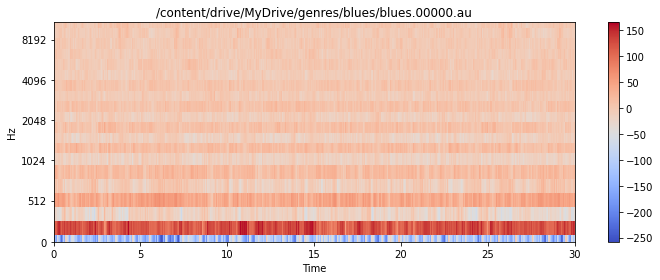

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
display_mfcc('/content/drive/MyDrive/genres/blues/blues.00000.au')

In [ ]:
def extract_features_song(f):
    y, _ = librosa.load(f)

    # get Mel-frequency cepstral coefficients
    mfcc = librosa.feature.mfcc(y)
    # normalize values between -1,1 (divide by max)
    mfcc /= np.amax(np.absolute(mfcc))

    return np.ndarray.flatten(mfcc)[:25000]

In [ ]:
def generate_features_and_labels():
    all_features = []
    all_labels = []

    genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
    for genre in genres:
        sound_files = glob.glob('/content/drive/MyDrive/genres/'+genre+'/*.au')
        print('Processing %d songs in %s genre...' % (len(sound_files), genre))
        for f in sound_files:
            features = extract_features_song(f)
            all_features.append(features)
            all_labels.append(genre)

    # convert labels to one-hot encoding
    label_uniq_ids, label_row_ids = np.unique(all_labels, return_inverse=True)
    label_row_ids = label_row_ids.astype(np.int32, copy=False)
    onehot_labels = to_categorical(label_row_ids, len(label_uniq_ids))
    return np.stack(all_features), onehot_labels

In [ ]:
features, labels = generate_features_and_labels()

Processing 100 songs in blues genre...
Processing 100 songs in classical genre...
Processing 100 songs in country genre...
Processing 100 songs in disco genre...
Processing 100 songs in hiphop genre...
Processing 100 songs in jazz genre...
Processing 100 songs in metal genre...
Processing 100 songs in pop genre...
Processing 100 songs in reggae genre...
Processing 100 songs in rock genre...


In [ ]:
print(np.shape(features))
print(np.shape(labels))

training_split = 0.8

# last column has genre, turn it into unique ids
alldata = np.column_stack((features, labels))

np.random.shuffle(alldata)
splitidx = int(len(alldata) * training_split)
train, test = alldata[:splitidx,:], alldata[splitidx:,:]

print(np.shape(train))
print(np.shape(test))

train_input = train[:,:-10]
train_labels = train[:,-10:]

test_input = test[:,:-10]
test_labels = test[:,-10:]

print(np.shape(train_input))
print(np.shape(train_labels))

(1000, 25000)
(1000, 10)
(800, 25010)
(200, 25010)
(800, 25000)
(800, 10)


In [ ]:
model = Sequential([
    Dense(100, input_dim=np.shape(train_input)[1]),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
    ])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

model.fit(train_input, train_labels, epochs=10, batch_size=32,
          validation_split=0.2)

loss, acc = model.evaluate(test_input, test_labels, batch_size=32)

print("Done!")
print("Loss: %.4f, accuracy: %.4f" % (loss, acc))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               2500100   
                                                                 
 activation_2 (Activation)   (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 2,501,110
Trainable params: 2,501,110
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
20/20 [==============================] - 1s 39ms/step - loss: 2.2147 - accuracy: 0.2562 - val_loss: 1.9201 - val_accuracy: 0.3250
Epoch 2/10
20/20 [============